In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command
import seaborn as sns

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\91931\\Downloads'

In [4]:
df = pd.read_csv('titanic_train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="O")# object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df.describe(percentiles=[0.10,0.20,0.50,0.90])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.isnull().sum().sum()

866

In [14]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [15]:
len(df)

891

In [16]:
df1=df.copy()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# percentage of missing value
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [19]:
df1=df.copy()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df1.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [22]:
df1["Age"]=df1["Age"].fillna(df1["Age"].mean())

In [23]:
df1["Embarked"] = df1["Embarked"].fillna(df1["Embarked"].mode()[0])

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [25]:
df1.isnull().sum().sum()

0

<Axes: >

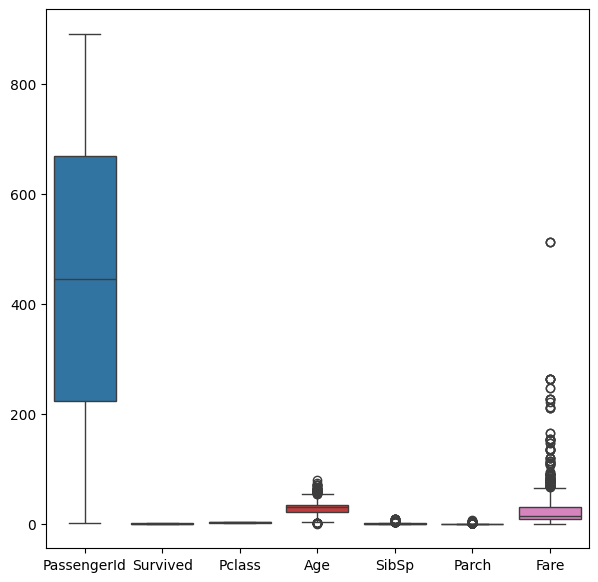

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df1)

In [27]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})
df1['Embarked'] = df1['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [29]:
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return np.clip(series, lower_bound, upper_bound)
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
for column in numerical_columns:
    df1[column] = cap_outliers(df1[column])

<Axes: >

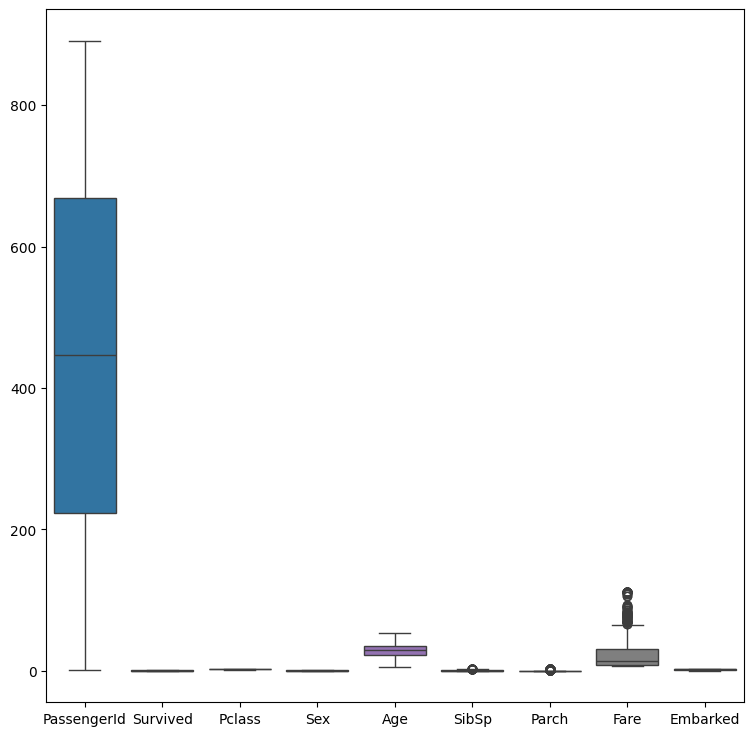

In [30]:
plt.figure(figsize=(9,9))
sns.boxplot(data=df1)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


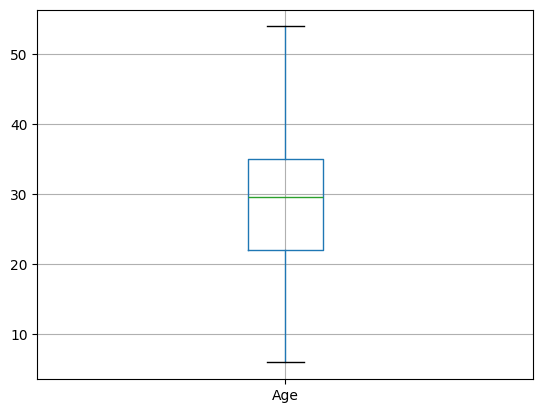

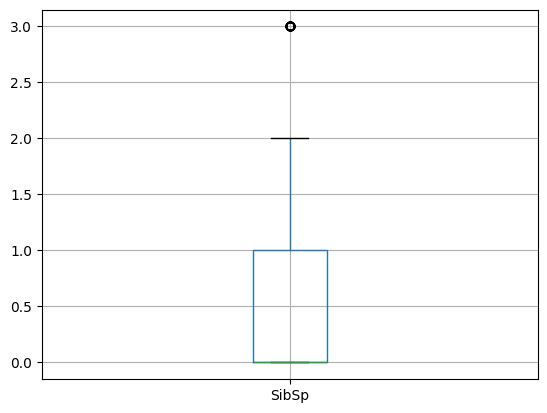

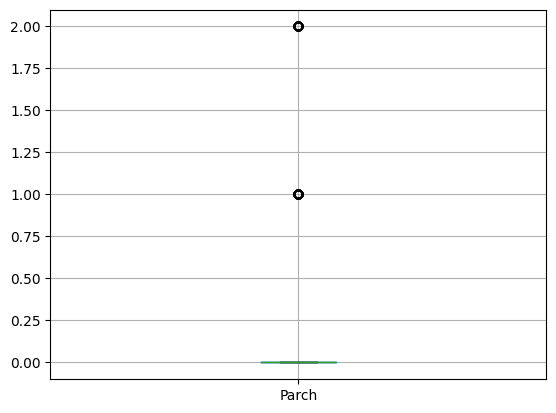

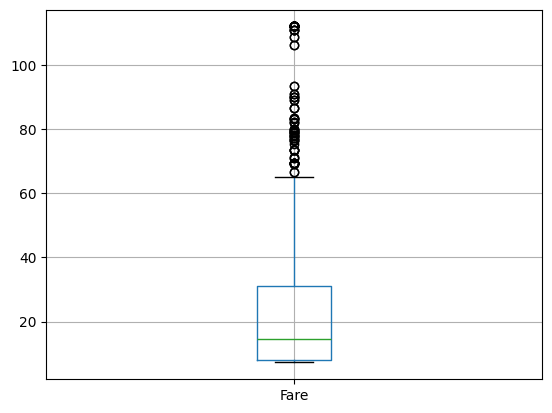

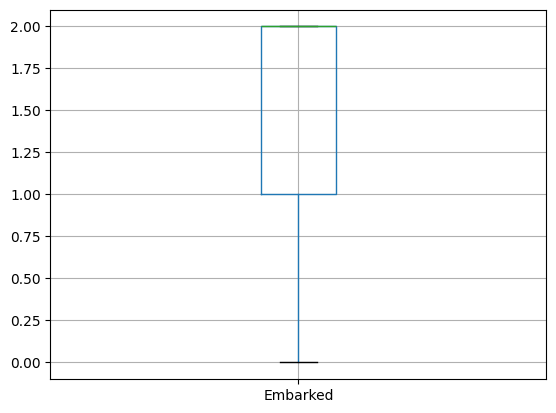

In [32]:
df100=df1[["Age","SibSp","Parch","Fare", "Embarked"]]
for column in df100:
    plt.figure()
    df100.boxplot([column])

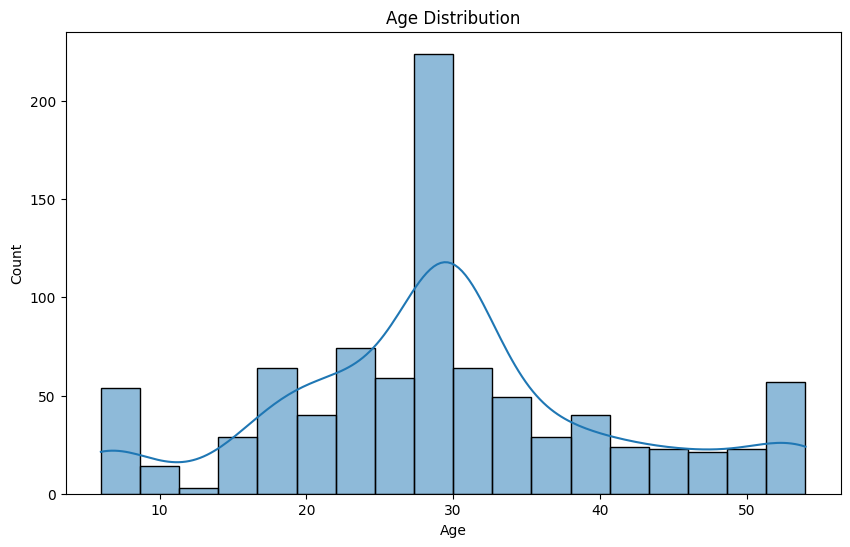

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

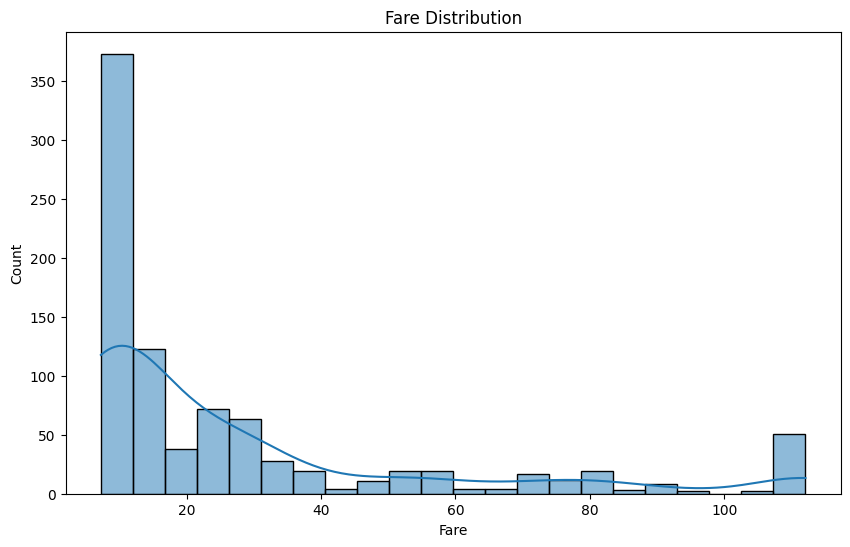

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

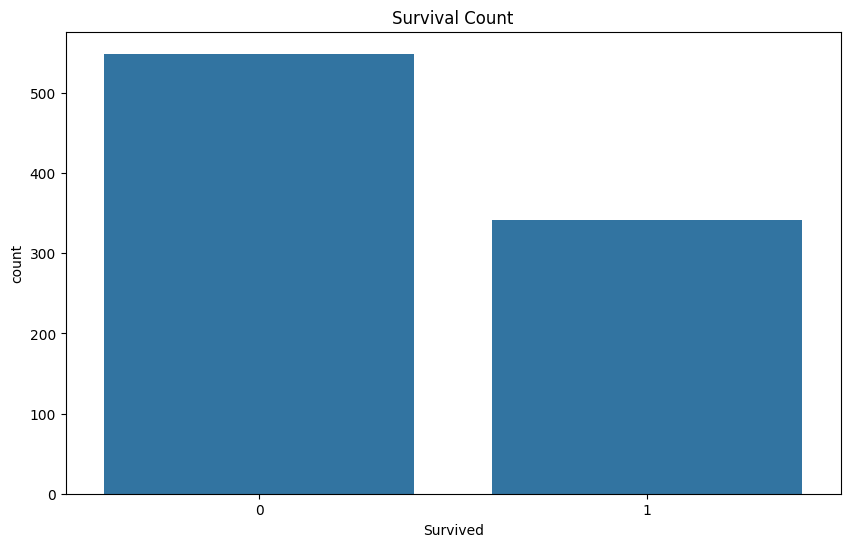

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df1)
plt.title('Survival Count')
plt.show()

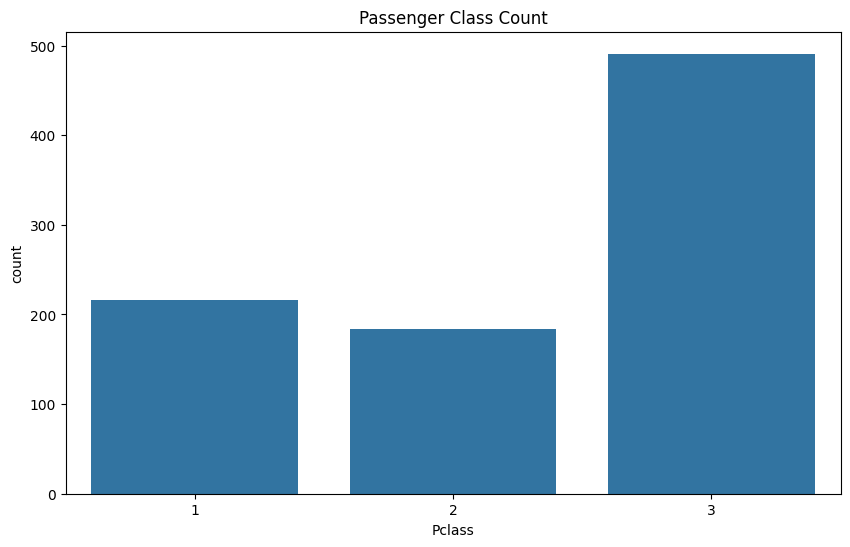

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df1)
plt.title('Passenger Class Count')
plt.show()

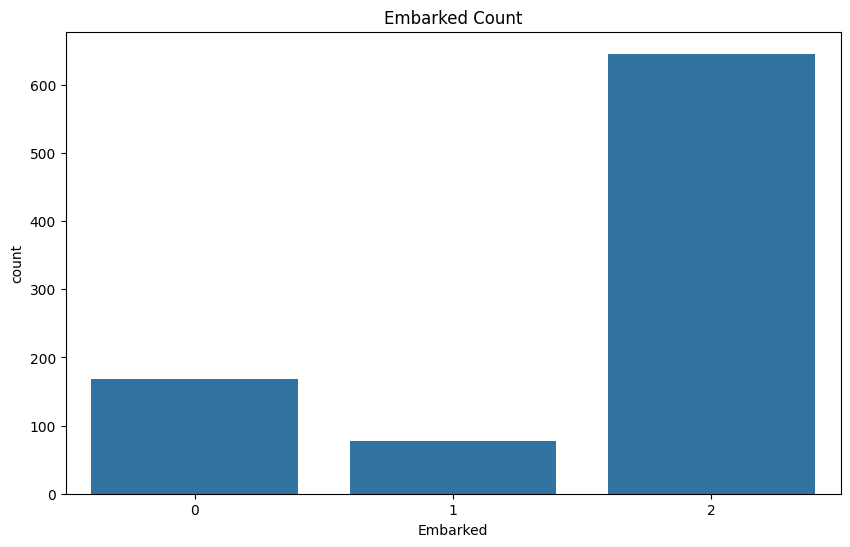

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df1)
plt.title('Embarked Count')
plt.show()

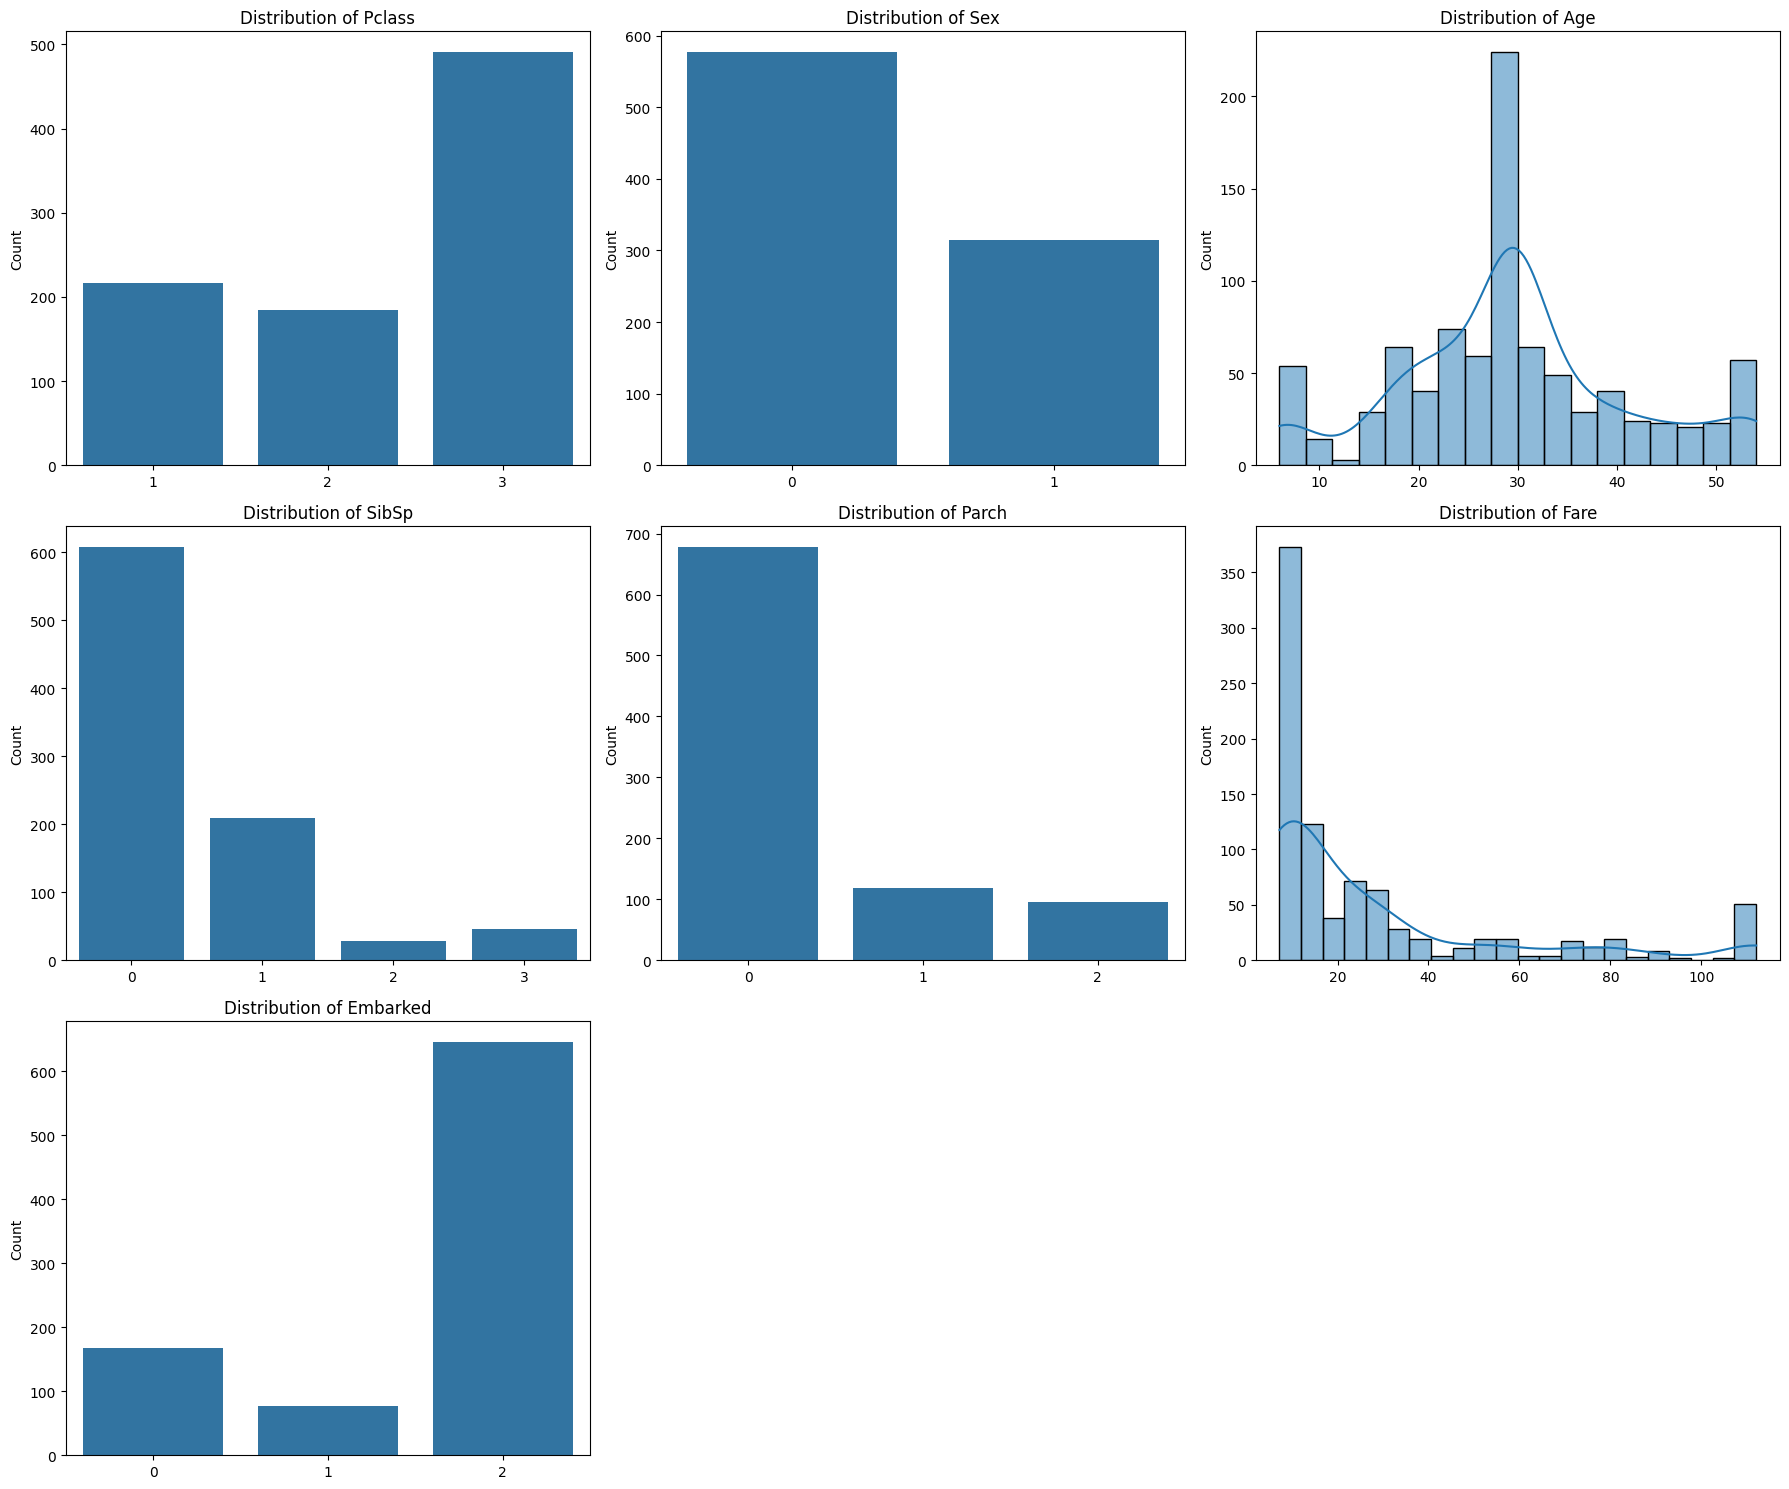

In [38]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

axes = axes.flatten()

for i, feature in enumerate(features):
    if df1[feature].dtype == 'object' or len(df1[feature].unique()) < 10:  
        sns.countplot(x=feature, data=df1, ax=axes[i])
    else:  
        sns.histplot(df1[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


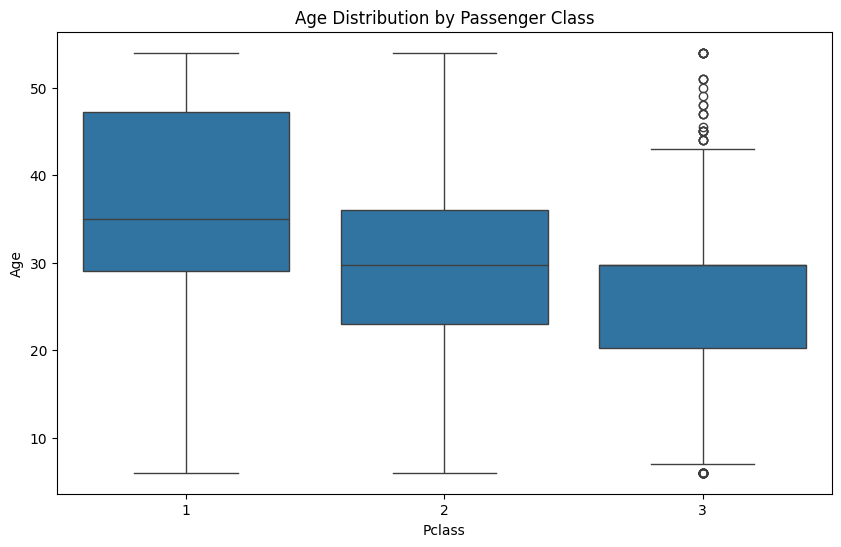

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df1)
plt.title('Age Distribution by Passenger Class')
plt.show()

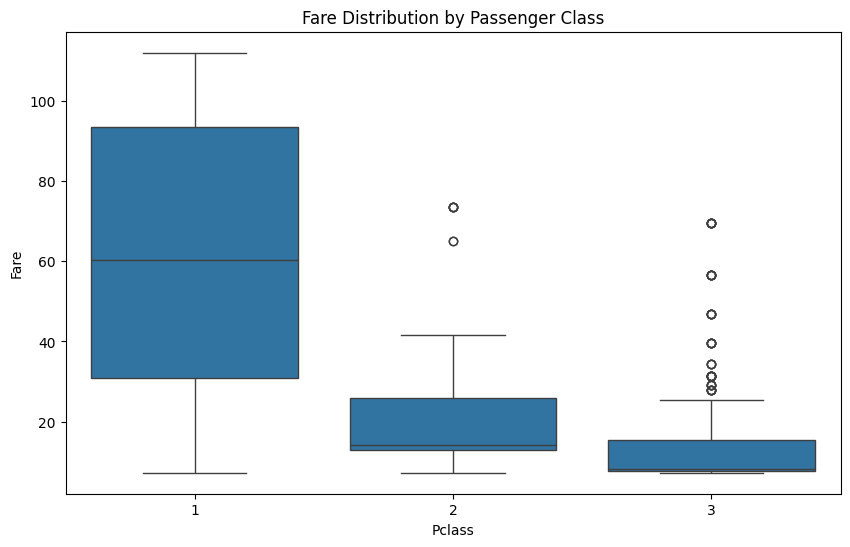

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df1)
plt.title('Fare Distribution by Passenger Class')
plt.show()

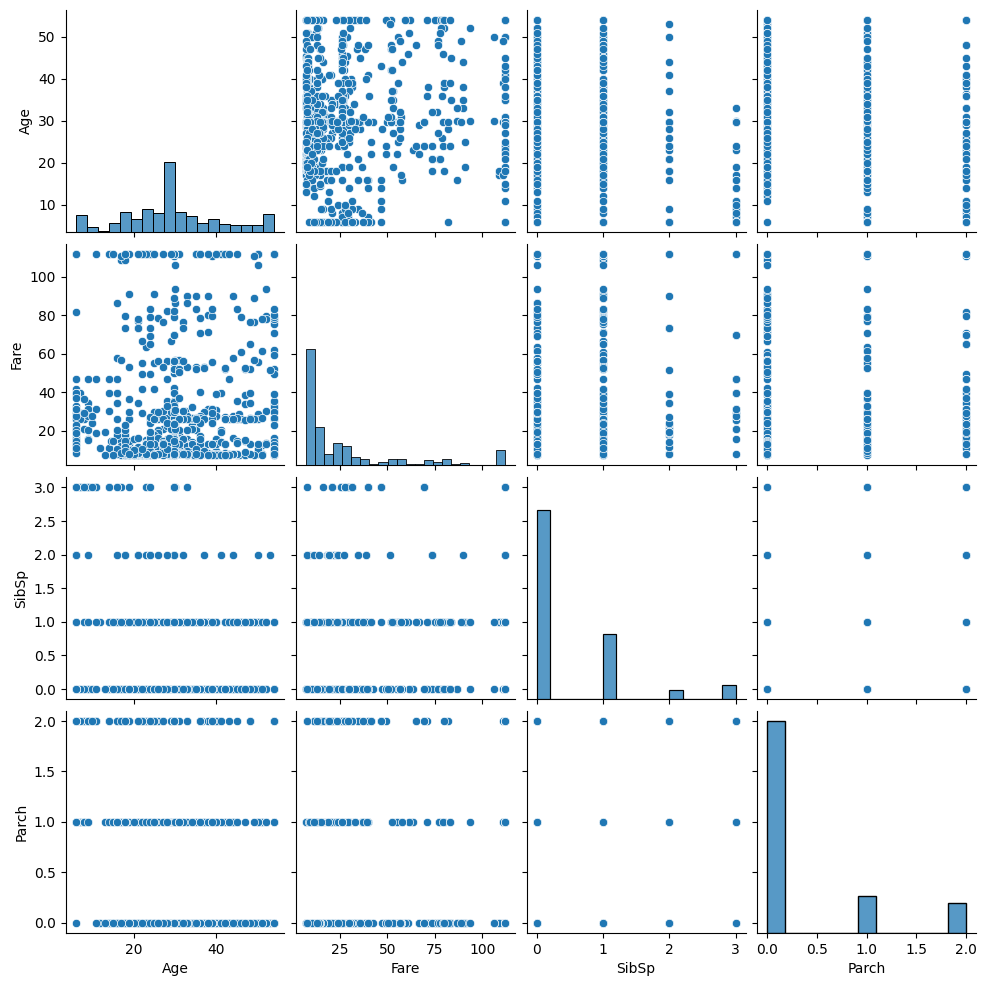

In [41]:
sns.pairplot(df1[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

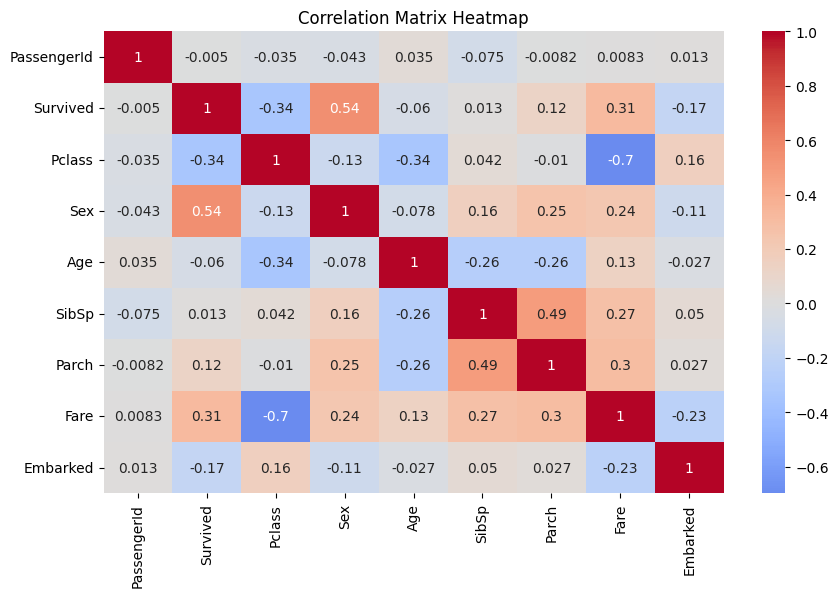

In [42]:
plt.figure(figsize=(10, 6))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

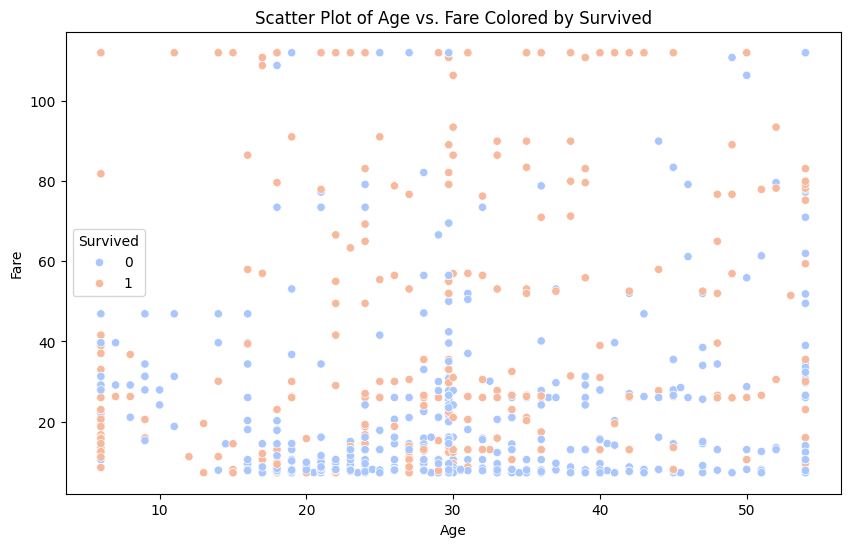

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df1, palette='coolwarm')
plt.title('Scatter Plot of Age vs. Fare Colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

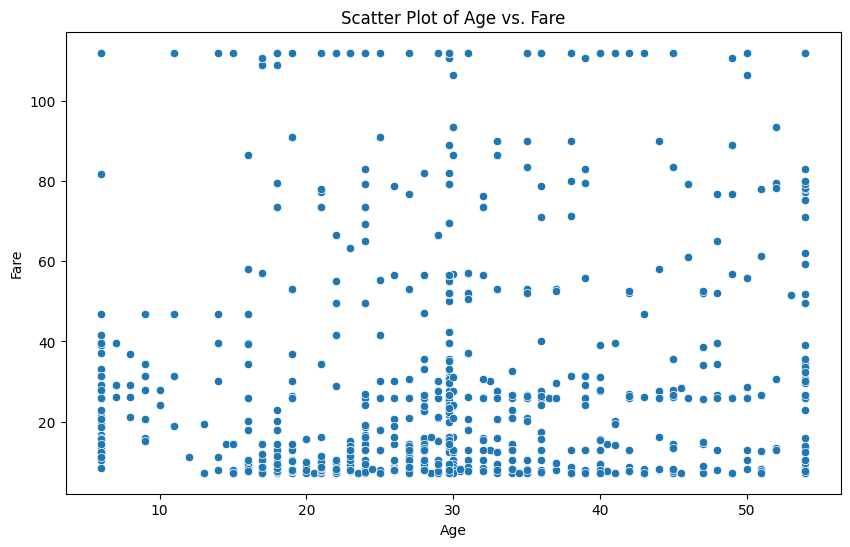

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df1)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

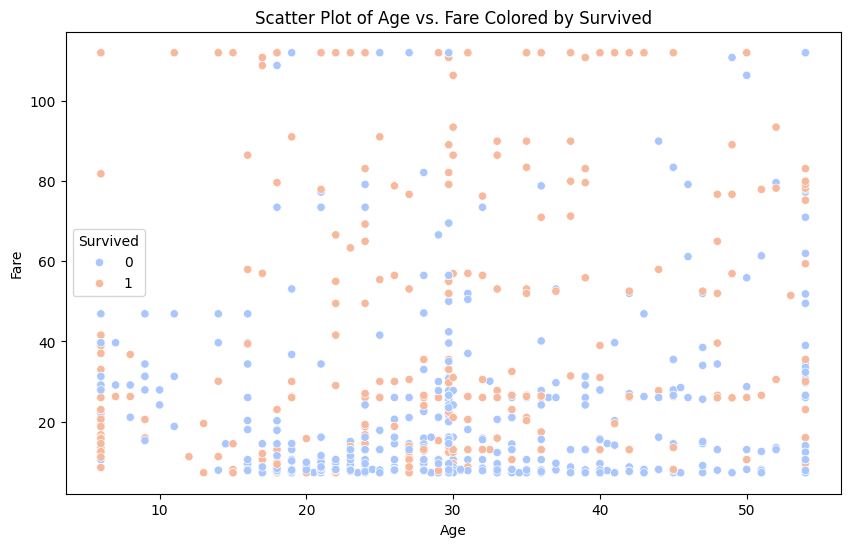

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df1, palette='coolwarm')
plt.title('Scatter Plot of Age vs. Fare Colored by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

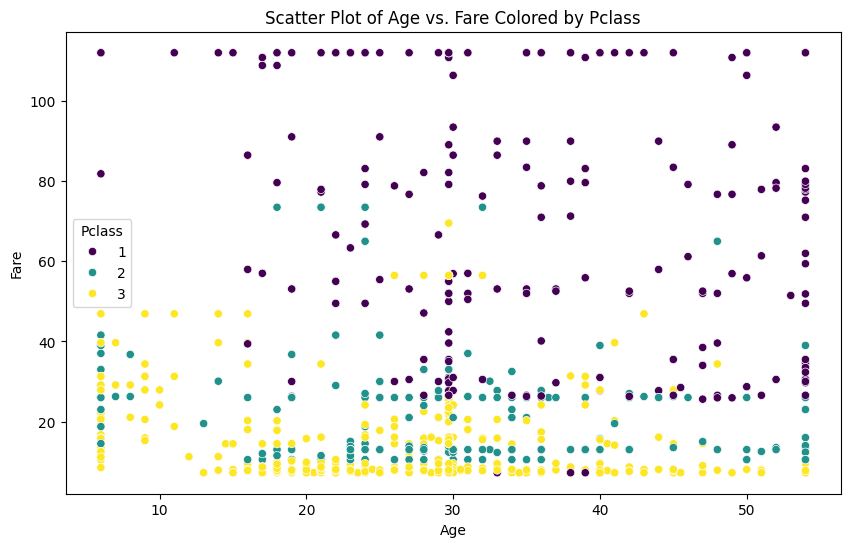

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df1, palette='viridis')
plt.title('Scatter Plot of Age vs. Fare Colored by Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

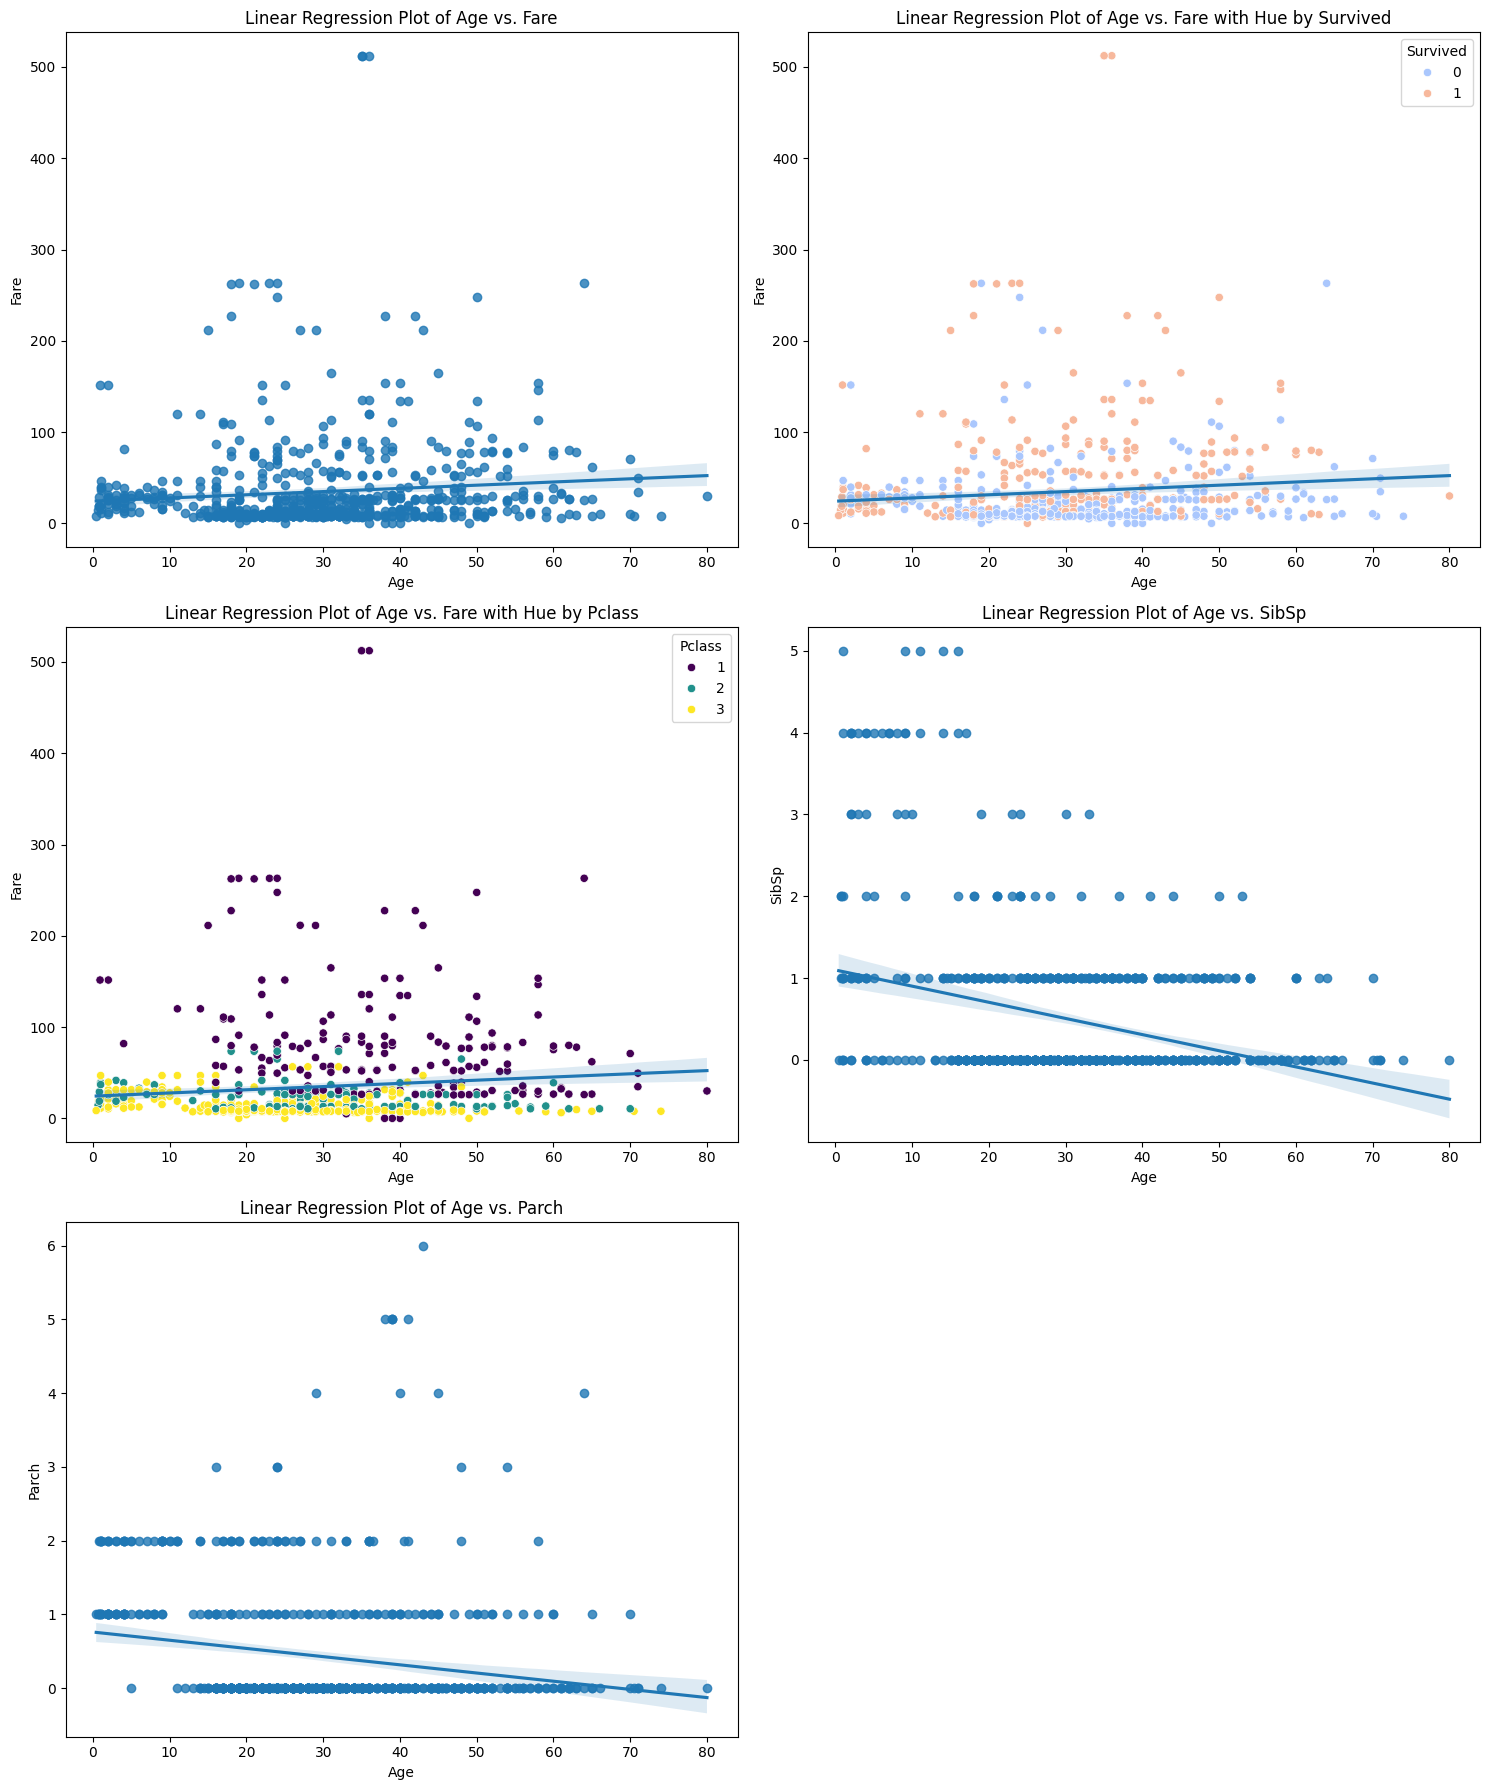

In [47]:
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

sns.regplot(x='Age', y='Fare', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Linear Regression Plot of Age vs. Fare')

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='coolwarm', ax=axs[0, 1])
sns.regplot(x='Age', y='Fare', data=df, scatter=False, ax=axs[0, 1])
axs[0, 1].set_title('Linear Regression Plot of Age vs. Fare with Hue by Survived')

sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=df, palette='viridis', ax=axs[1, 0])
sns.regplot(x='Age', y='Fare', data=df, scatter=False, ax=axs[1, 0])
axs[1, 0].set_title('Linear Regression Plot of Age vs. Fare with Hue by Pclass')

sns.regplot(x='Age', y='SibSp', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Linear Regression Plot of Age vs. SibSp')

sns.regplot(x='Age', y='Parch', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Linear Regression Plot of Age vs. Parch')

axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [48]:
x = df1.drop(['Survived'], axis=1)
y = df1['Survived']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
x_train.shape

(712, 8)

In [51]:
x_test.shape

(179, 8)

In [52]:
scaler = StandardScaler()

In [54]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [55]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [56]:
train_scaled = pd.concat([x_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
test_scaled = pd.concat([x_test_scaled_df, y_test.reset_index(drop=True)], axis=1)

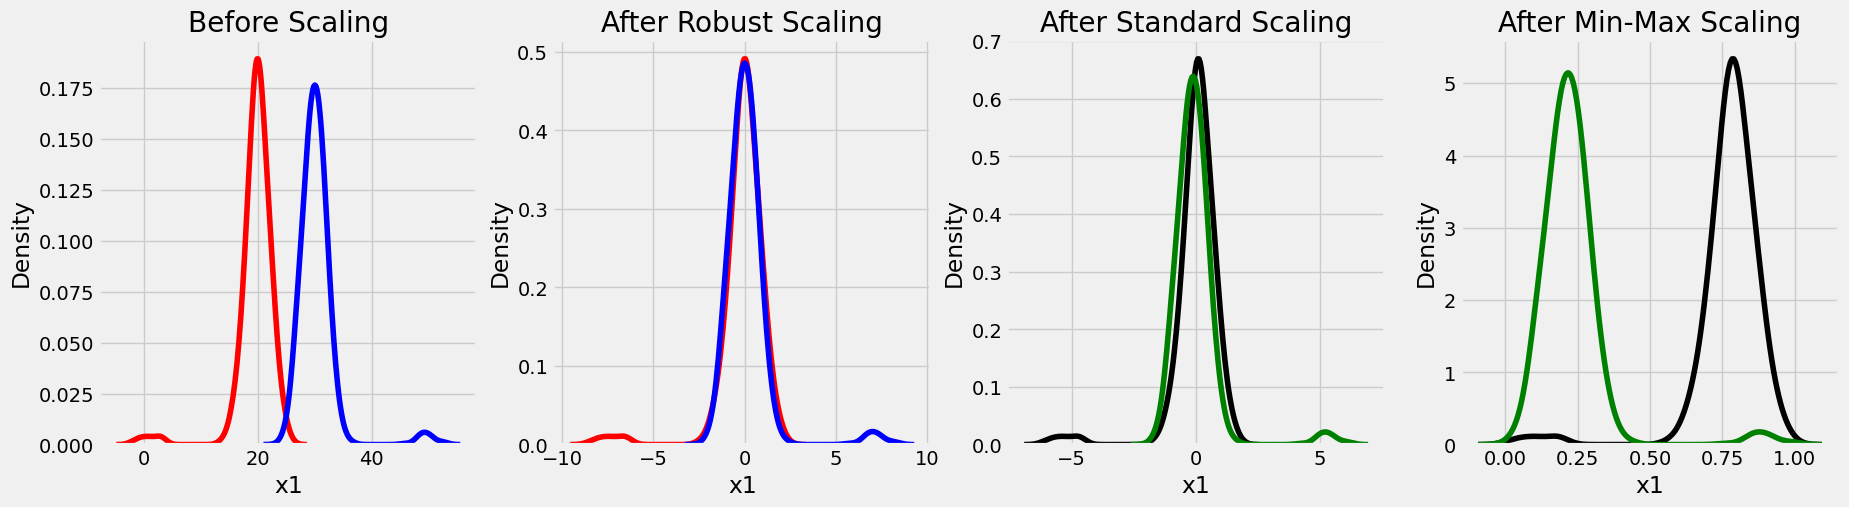

In [57]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('fivethirtyeight')
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
R2score = r2_score( y_test , y_predict )*100
print('The R2score for Linear Regression is ' , R2score)

The R2score for Linear Regression is  43.49604398896264


In [59]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate model with 1000 decision trees

dt = DecisionTreeRegressor()
# Train the model on training data
dt.fit(x_train, y_train);
y_predict = dt.predict(x_test)
print('The R2score for Decision Tree Regressor is ' , r2_score( y_test , y_predict ))

The R2score for Decision Tree Regressor is  -0.059716859716859805


In [60]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);
y_predict = rf.predict(x_test)
print('The R2score for Random Forest Regressor is ' , r2_score( y_test , y_predict ))


The R2score for Random Forest Regressor is  0.4252145743886744


In [61]:
featureImportance = pd.Series(rf.feature_importances_ , index = x_train.columns).sort_values(ascending = True)
featureImportance

Parch          0.012892
Embarked       0.024797
SibSp          0.042184
Pclass         0.101319
Age            0.148472
Fare           0.168210
PassengerId    0.208006
Sex            0.294120
dtype: float64

In [62]:
df_x_train = x_train[ ['Pclass', 'Age', 'Fare']]
df_x_test = x_test[ ['Pclass', 'Age', 'Fare']]
rf_improved = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_improved.fit(df_x_train, y_train);
y_predict = rf_improved.predict(df_x_test)

R2score = r2_score( y_test , y_predict )
print('The R2score for Random Forest Regressor is ' , (R2score*100))

The R2score for Random Forest Regressor is  15.083418475481148


In [63]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
dt = DecisionTreeRegressor(random_state = 42)
# Train the model on training data
dt.fit(x_train, y_train);
y_predict = dt.predict(x_test)

R2score = r2_score( y_test , y_predict )
print('The R2score for Decision tree Regressor is ' , (R2score *100))

The R2score for Decision tree Regressor is  -5.9716859716859805


In [64]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)

R2score_rbf = r2_score( y_test , y_rbf )
print('The R2score for RBF is ' , R2score_rbf )

The R2score for RBF is  0.046543535936969915


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
y_predict = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print('Accuracy of Logistic Regression model:', accuracy * 100)

Accuracy of Logistic Regression model: 79.88826815642457


In [68]:
conf_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[88 17]
 [19 55]]


In [69]:
class_report = classification_report(y_test, y_predict)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [70]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

In [72]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score:', roc_auc)

ROC AUC score: 0.8765765765765766


In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

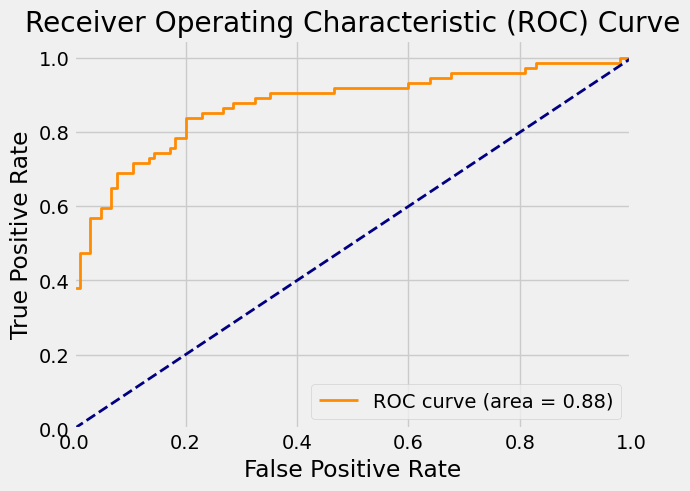

In [74]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()